In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LinReg  
from sklearn.linear_model import Lasso       
from sklearn.linear_model import Ridge      
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR


In [2]:
#%pip install lazypredict

In [3]:
"""%pip install xgboost

%pip install catboost

%pip install lightgbm"""

'%pip install xgboost\n\n%pip install catboost\n\n%pip install lightgbm'

In [4]:
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR
from lazypredict.Supervised import LazyRegressor 

In [5]:
mad_total = pd.read_csv('../analisis_exploratorio/mad_total_limp.csv')

In [6]:
mad_centro = pd.read_csv('../analisis_exploratorio/mad_int_limp.csv')

In [7]:
mad_exterior = pd.read_csv('../analisis_exploratorio/mad_ext_limp.csv')

In [8]:
alquiler = pd.read_csv('../analisis_exploratorio/alquiler_limp.csv')

In [9]:
mad_total

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77,1022.74
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77,1022.74
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77,1022.74
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77,1022.74
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77,1022.74
...,...,...,...,...,...,...,...,...,...,...,...,...
35779,1,exterior,sureste,1400000,805,12,-4,2,2,1739.13,1291.27,1140.37
35780,1,exterior,sureste,1400000,950,10,-4,2,2,1473.68,1291.27,1140.37
35781,1,exterior,sureste,1500000,500,5,-4,2,2,3000.00,1291.27,1140.37
35782,1,exterior,sureste,2000000,3000,1,-4,2,2,666.67,1291.27,1140.37


In [10]:
modelo_num = mad_total.drop(columns=['distrito_€/m2','€/m2','zona','distrito'])

In [11]:
modelo = mad_total.drop(columns=['distrito_€/m2','€/m2'])

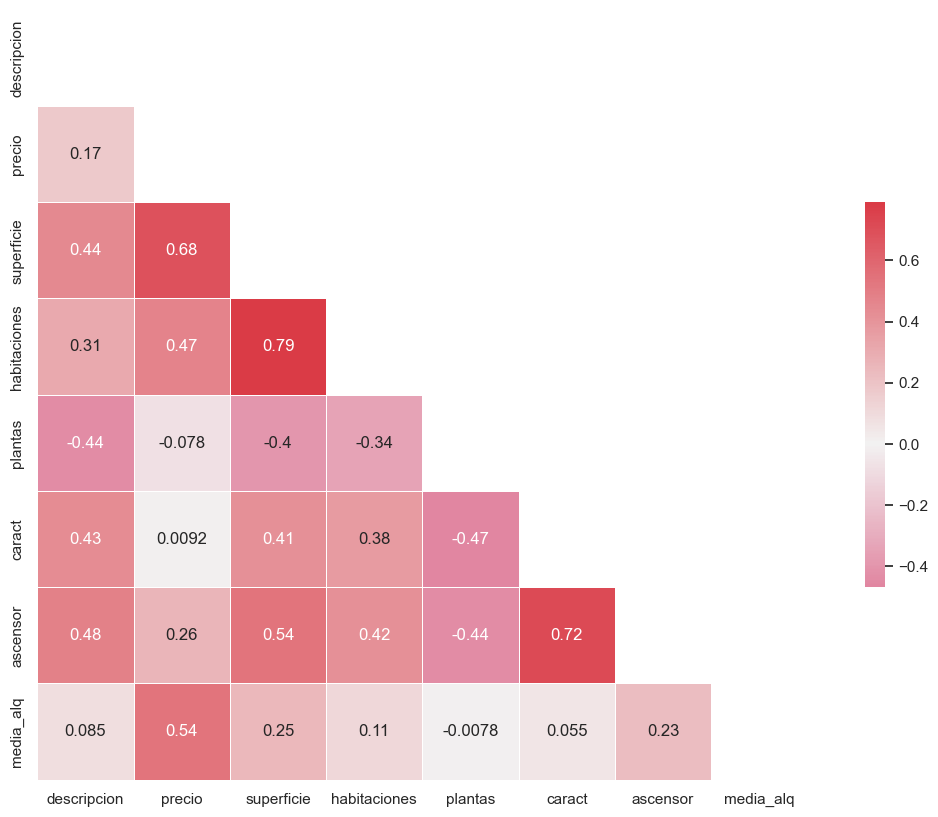

In [12]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(modelo_num.corr(method='spearman'), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(modelo_num.corr(method='spearman'),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [13]:
X = modelo.drop('precio', axis=1)

y = modelo.precio

In [14]:
X = X.drop(columns=['media_alq','caract'])

In [15]:
X_train, X_test, y_train, y_test = tts(X, y,
                                      train_size=0.8,
                                      test_size=0.2,
                                      random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28627, 7), (7157, 7), (28627,), (7157,))

In [16]:
"""from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)"""

'from lazypredict.Supervised import LazyRegressor\n\nreg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)\n\nmodels, predictions = reg.fit(X_train, X_test, y_train, y_test)\n\nprint(models)'

In [17]:
X = pd.get_dummies(X, columns=['zona'], dtype=int, drop_first=True)

X_train = pd.get_dummies(X_train, columns=['zona'], dtype=int, drop_first=True)

X_test = pd.get_dummies(X_test, columns=['zona'], dtype=int, drop_first=True)

In [18]:
X = pd.get_dummies(X, columns=['distrito'], dtype=int, drop_first=True)

X_train = pd.get_dummies(X_train, columns=['distrito'], dtype=int, drop_first=True)

X_test = pd.get_dummies(X_test, columns=['distrito'], dtype=int, drop_first=True)

In [19]:
X_train

,descripcion,superficie,habitaciones,plantas,ascensor,zona_exterior,distrito_barajas,distrito_barrio de salamanca,distrito_carabanchel,distrito_centro,distrito_chamartin,distrito_chamberi,distrito_ciudad lineal,distrito_corredor de henares,distrito_fuencarral,distrito_hortaleza,distrito_latina,distrito_moncloa,distrito_moratalaz,distrito_noroeste,distrito_norte,distrito_puente de vallecas,distrito_retiro,distrito_san blas,distrito_sur,distrito_sureste,distrito_suroeste,distrito_tetuan,distrito_usera,distrito_vicalvaro,distrito_villa de vallecas,distrito_villaverde
24788,1,220,3,-4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8023,0,51,2,-2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31702,0,112,3,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
35765,1,1000,7,-4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31782,0,107,4,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0,139,5,8,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6265,0,100,3,7,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11284,0,110,4,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,0,67,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
from sklearn.metrics import mean_squared_error as mse

In [21]:
mad_total.distrito.unique()

array(['villaverde', 'barrio de salamanca', 'villa de vallecas',
       'vicalvaro', 'usera', 'tetuan', 'san blas', 'retiro',
       'puente de vallecas', 'moratalaz', 'moncloa', 'latina',
       'hortaleza', 'fuencarral', 'ciudad lineal', 'chamberi',
       'chamartin', 'centro', 'carabanchel', 'barajas', 'arganzuela',
       'corredor de henares', 'noroeste', 'norte', 'suroeste', 'sur',
       'sureste'], dtype=object)

In [22]:
df1 = mad_total[mad_total['distrito']=='villaverde']

In [23]:
df1.shape

(507, 12)

In [24]:
df1.sort_values(by='precio')

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77,1022.74
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77,1022.74
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77,1022.74
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77,1022.74
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77,1022.74
...,...,...,...,...,...,...,...,...,...,...,...,...
503,2,central,villaverde,375000,160,3,-3,1,1,2343.75,2109.77,1022.74
502,2,central,villaverde,375000,111,3,4,1,1,3378.38,2109.77,1022.74
504,2,central,villaverde,382000,119,3,5,1,1,3210.08,2109.77,1022.74
505,0,central,villaverde,450000,151,3,5,1,1,2980.13,2109.77,1022.74


In [25]:
df1

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77,1022.74
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77,1022.74
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77,1022.74
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77,1022.74
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77,1022.74
...,...,...,...,...,...,...,...,...,...,...,...,...
502,2,central,villaverde,375000,111,3,4,1,1,3378.38,2109.77,1022.74
503,2,central,villaverde,375000,160,3,-3,1,1,2343.75,2109.77,1022.74
504,2,central,villaverde,382000,119,3,5,1,1,3210.08,2109.77,1022.74
505,0,central,villaverde,450000,151,3,5,1,1,2980.13,2109.77,1022.74


In [26]:
df1.precio.describe()

count      507.00
mean    165198.89
std      76517.41
min      26100.00
25%     109500.00
50%     146000.00
75%     215000.00
max     799000.00
Name: precio, dtype: float64

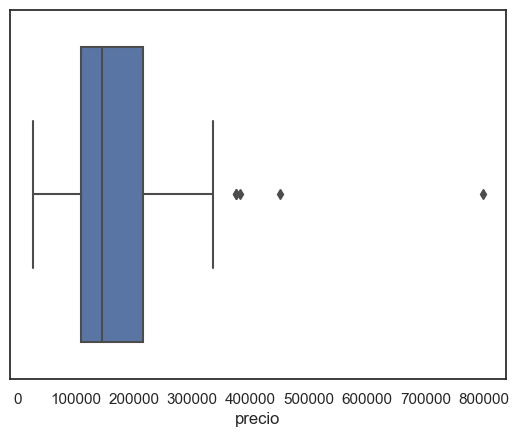

In [27]:
sns.boxplot(x=df1['precio'])
plt.show()

In [28]:
"""def remove_outliers(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return data[~((data < lower_bound) | (data > upper_bound))].dropna()
df1['precio'] = remove_outliers(df1['precio'])
df1 = df1.dropna()"""

"def remove_outliers(data, threshold=1.5):\n    q1 = data.quantile(0.25)\n    q3 = data.quantile(0.75)\n    iqr = q3 - q1\n    lower_bound = q1 - threshold * iqr\n    upper_bound = q3 + threshold * iqr\n    return data[~((data < lower_bound) | (data > upper_bound))].dropna()\ndf1['precio'] = remove_outliers(df1['precio'])\ndf1 = df1.dropna()"

In [29]:
df1.shape

(507, 12)

In [30]:
df1 = df1.drop(columns=['distrito_€/m2','€/m2','zona','distrito','media_alq'])

In [31]:
X = df1.drop('precio', axis=1)

y = df1.precio

In [32]:
#X = X.drop(columns=['zona','distrito','media_alq'])

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
"""scaler = StandardScaler()

X[['descripcion', 'superficie', 'habitaciones',
   'plantas', 'caract', 'ascensor']] = scaler.fit_transform(X[['descripcion', 'superficie', 'habitaciones',
                                                               'plantas', 'caract', 'ascensor']])"""

"scaler = StandardScaler()\n\nX[['descripcion', 'superficie', 'habitaciones',\n   'plantas', 'caract', 'ascensor']] = scaler.fit_transform(X[['descripcion', 'superficie', 'habitaciones',\n                                                               'plantas', 'caract', 'ascensor']])"

In [35]:
X_train, X_test, y_train, y_test = tts(X, y,
                                      train_size=0.8,
                                      test_size=0.2,
                                      random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((405, 6), (102, 6), (405,), (102,))

In [36]:
"""plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(X.corr(method='spearman'), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(X.corr(method='spearman'),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});"""

"plt.figure(figsize=(15, 10))\n\nsns.set(style='white')\n\nmask=np.triu(np.ones_like(X.corr(method='spearman'), dtype=bool))\n\ncmap=sns.diverging_palette(0, 10, as_cmap=True)\n\n\nsns.heatmap(X.corr(method='spearman'),\n           mask=mask,\n          cmap=cmap,\n          center=0,\n          square=True,\n          annot=True,\n          linewidths=0.5,\n          cbar_kws={'shrink': 0.5});"

In [37]:
rfr = RFR(n_estimators=500, random_state=20)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse(y_test, y_pred, squared=False)

43433.38444412808

In [38]:
print(f"Test accuracy: {rfr.score(X_test, y_test):0.4f}")

Test accuracy: 0.7018


In [39]:
mse(y_test, y_pred, squared=False)*100/df1.precio.mean()

26.291571042793727

In [40]:
dict(zip(X.columns, rfr.feature_importances_*100))

{'descripcion': 2.168447480513122,
 'superficie': 66.16504472612374,
 'habitaciones': 10.69840284442896,
 'plantas': 9.95283464383179,
 'caract': 3.760916935214482,
 'ascensor': 7.254353369887885}

In [41]:
linreg=LinReg()

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mse(y_test, y_pred, squared=False)

49359.35317580968

In [42]:
print(f"Test accuracy: {linreg.score(X_test, y_test):0.4f}")

Test accuracy: 0.6148


In [43]:
mse(y_test, y_pred, squared=False)*100/df1.precio.mean()

29.8787432123216

In [44]:
xgbr=XGBR(random_state=42)

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)

49325.808875307564

In [45]:
print(f"Test accuracy: {xgbr.score(X_test, y_test):0.4f}")

Test accuracy: 0.6154


In [46]:
mse(y_test, y_pred, squared=False)*100/df1.precio.mean()

29.85843780966833

In [47]:
dict(zip(X.columns, xgbr.feature_importances_*100))

{'descripcion': 5.592051,
 'superficie': 26.864546,
 'habitaciones': 6.84198,
 'plantas': 7.7920637,
 'caract': 12.766546,
 'ascensor': 40.142815}

In [48]:
gbr=GBR(random_state=42)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse(y_test, y_pred, squared=False)

42784.91071728582

In [49]:
print(f"Test accuracy: {gbr.score(X_test, y_test):0.4f}")

Test accuracy: 0.7106


In [50]:
mse(y_test, y_pred, squared=False)*100/df1.precio.mean()

25.89902983798408

In [51]:
dict(zip(X.columns, gbr.feature_importances_*100))

{'descripcion': 1.9600101526364802,
 'superficie': 69.18431907737198,
 'habitaciones': 9.87888775542066,
 'plantas': 5.943746431247234,
 'caract': 3.8346139952667233,
 'ascensor': 9.198422588056932}

In [52]:
df1

,descripcion,precio,superficie,habitaciones,plantas,caract,ascensor
0,0,26100,59,2,3,3,0
1,0,50600,53,3,2,3,3
2,0,51700,60,3,3,1,0
3,0,51700,60,3,3,3,0
4,0,51700,59,3,4,1,0
...,...,...,...,...,...,...,...
502,2,375000,111,3,4,1,1
503,2,375000,160,3,-3,1,1
504,2,382000,119,3,5,1,1
505,0,450000,151,3,5,1,1


In [53]:
X1 = df1.drop(columns='precio')
y1 = df1.precio

In [54]:
xgbr=XGBR(random_state=42)
xgbr.fit(X1, y1)
y1_pred = xgbr.predict(X1)
mse(y1_pred, y1, squared=False)

11647.044929993643

In [55]:
dict(zip(X.columns, xgbr.feature_importances_*100))

{'descripcion': 7.7857957,
 'superficie': 30.365145,
 'habitaciones': 7.7122083,
 'plantas': 9.203278,
 'caract': 13.920453,
 'ascensor': 31.013128}

In [62]:
df1.precio.mean()

165198.89349112427

In [56]:
print(f"Test accuracy: {xgbr.score(X1, y1):0.4f}")

Test accuracy: 0.9768


In [57]:
mse(y1_pred, y1, squared=False)*100/df1.precio.mean()

7.050316551072667

In [63]:
rfr=RFR(random_state=42)
rfr.fit(X1, y1)
y1_pred = rfr.predict(X1)
mse(y1_pred, y1, squared=False)

19000.052148176743

In [59]:
dict(zip(X.columns, rfr.feature_importances_*100))

{'descripcion': 2.1991180317918047,
 'superficie': 67.12052822315127,
 'habitaciones': 9.872640576381805,
 'plantas': 9.985670931543886,
 'caract': 4.064899330278626,
 'ascensor': 6.757142906852612}

In [60]:
print(f"Test accuracy: {rfr.score(X1, y1):0.4f}")

Test accuracy: 0.9371


In [61]:
mse(y1_pred, y1, squared=False)*100/df1.precio.mean()

11.604889279937208